In [1]:
import pandas as pd

words = [
    "りんご",
    "みかん",
    "ぶどう",
    "暖かい",
    "熱い",
    "寒い",
    "冷たい",
    "青い",
    "赤い",
    "情熱的",
    "冷静",
]

from openai import OpenAI

client = OpenAI()


def get_embedding(text, model="text-embedding-3-small", dim=None):
    text = text.replace("\n", " ")
    if dim is None:
        return client.embeddings.create(input=[text], model=model).data[0].embedding
    else:
        return (
            client.embeddings.create(input=[text], model=model, dimensions=dim)
            .data[0]
            .embedding
        )

## PCA

In [2]:
df = pd.DataFrame(words, columns=["word"])
df["emb"] = df["word"].apply(lambda x: get_embedding(x))

,word,emb,pca1,pca2,shape
0,りんご,"[-0.0184478722512722, -0.01510552503168583, -0...",0.514978,0.045222,"(1536,)"
1,みかん,"[-0.021647315472364426, 0.005055529065430164, ...",0.521876,0.072573,"(1536,)"
2,ぶどう,"[0.03284597769379616, -0.040301673114299774, -...",0.538167,0.132583,"(1536,)"
3,暖かい,"[0.005794553551822901, -0.026451395824551582, ...",-0.340615,0.113955,"(1536,)"
4,熱い,"[-0.01062750443816185, -0.011944390833377838, ...",-0.393987,-0.281511,"(1536,)"
5,寒い,"[-0.026312358677387238, -0.02727668546140194, ...",-0.300244,0.206777,"(1536,)"
6,冷たい,"[-0.00323313451372087, -0.01888093538582325, -...",-0.299645,0.336993,"(1536,)"
7,青い,"[0.028276879340410233, 0.001297979149967432, -...",0.181917,-0.378086,"(1536,)"
8,赤い,"[-0.01496430579572916, -0.019690442830324173, ...",0.075742,-0.514950,"(1536,)"
9,情熱的,"[0.007010640110820532, -0.013373238034546375, ...",-0.410198,-0.278324,"(1536,)"


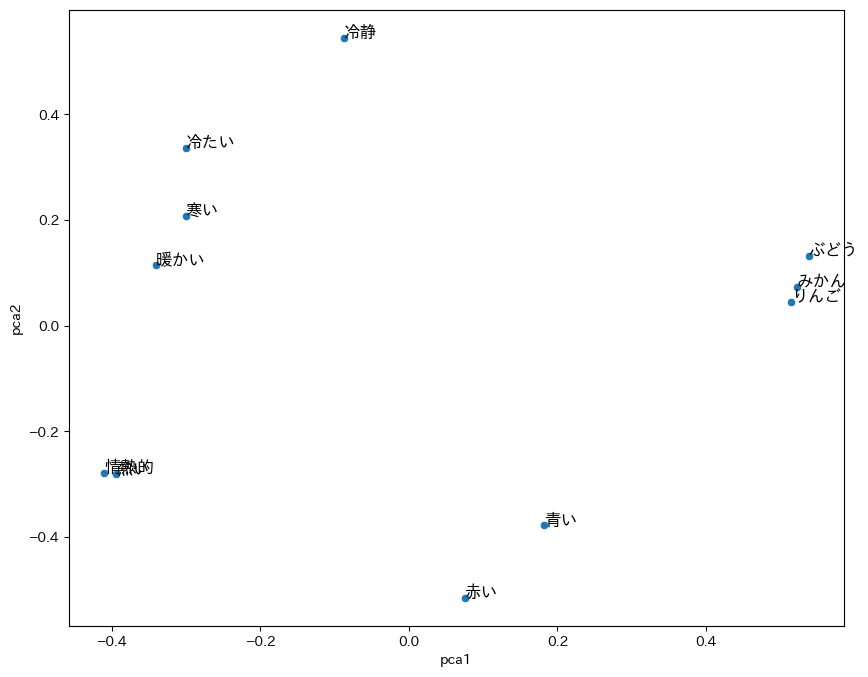

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import japanize_matplotlib
import numpy as np


pca = PCA(n_components=2)
pca_result = pca.fit_transform(df["emb"].values.tolist())
df["pca1"] = pca_result[:, 0]
df["pca2"] = pca_result[:, 1]
df["shape"] = df["emb"].apply(lambda x: np.array(x).shape)

display(df)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="pca1", y="pca2")
for i in range(len(df)):
    plt.text(df.pca1[i], df.pca2[i], df.word[i], fontsize=12)
plt.show()

## Dim = 2

In [4]:
df = pd.DataFrame(words, columns=["word"])
df["emb"] = df["word"].apply(lambda x: get_embedding(x, dim=2))

,word,emb,pca1,pca2
0,りんご,"[-0.0184478722512722, -0.01510552503168583, -0...",-0.018448,-0.015106
1,みかん,"[-0.021648388355970383, 0.00504175154492259, -...",-0.021648,0.005042
2,ぶどう,"[0.03284597769379616, -0.040301673114299774, -...",0.032846,-0.040302
3,暖かい,"[0.005794553551822901, -0.026451395824551582, ...",0.005795,-0.026451
4,熱い,"[-0.01062750443816185, -0.011944390833377838, ...",-0.010628,-0.011944
5,寒い,"[-0.026312358677387238, -0.02727668546140194, ...",-0.026312,-0.027277
6,冷たい,"[-0.00323313451372087, -0.01888093538582325, -...",-0.003233,-0.018881
7,青い,"[0.028276879340410233, 0.001297979149967432, -...",0.028277,0.001298
8,赤い,"[-0.014975816942751408, -0.019680656492710114,...",-0.014976,-0.019681
9,情熱的,"[0.007010640110820532, -0.013373238034546375, ...",0.007011,-0.013373


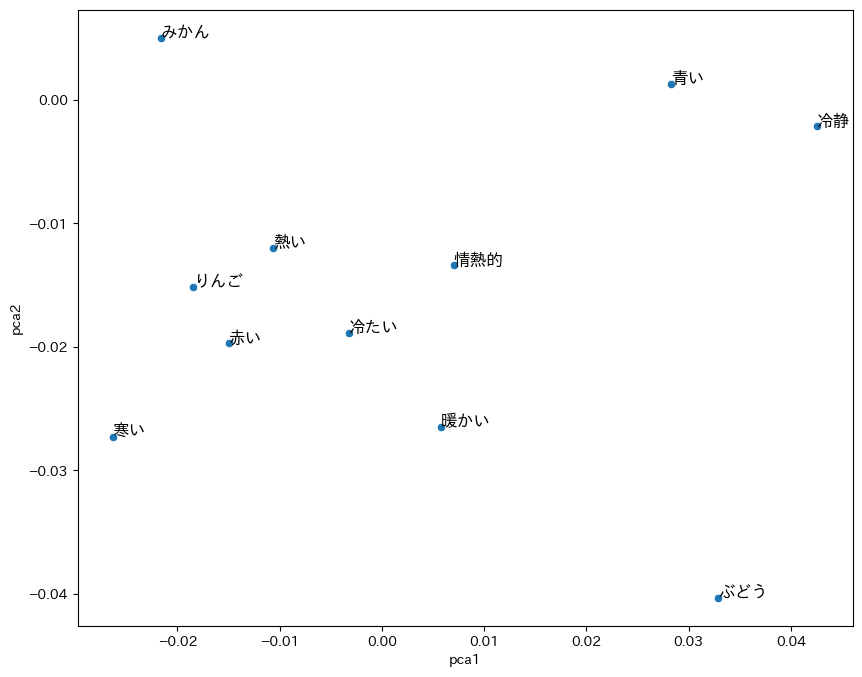

In [12]:
df["pca1"] = df["emb"].apply(lambda x: x[0])
df["pca2"] = df["emb"].apply(lambda x: x[1])

display(df)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="pca1", y="pca2")
for i in range(len(df)):
    plt.text(df.pca1[i], df.pca2[i], df.word[i], fontsize=12)
plt.show()

## Manually Reduce Dim

In [6]:
def normalize_l2(x):
    x = np.array(x)
    if x.ndim == 1:
        norm = np.linalg.norm(x)
        if norm == 0:
            return x
        return x / norm
    else:
        norm = np.linalg.norm(x, 2, axis=1, keepdims=True)
        return np.where(norm == 0, x, x / norm)

In [7]:
df = pd.DataFrame(words, columns=["word"])
df["emb"] = df["word"].apply(lambda x: get_embedding(x))

,word,emb,norm,pca1,pca2
0,りんご,"[-0.0184478722512722, -0.01510552503168583, -0...","[-0.7737144591440013, -0.633534478707754]",-0.773714,-0.633534
1,みかん,"[-0.021647315472364426, 0.005055529065430164, ...","[-0.9737965074940769, 0.22742111158012188]",-0.973797,0.227421
2,ぶどう,"[0.03284597769379616, -0.040301673114299774, -...","[0.6317605374288332, -0.77516361069624]",0.631761,-0.775164
3,暖かい,"[0.005794553551822901, -0.026451395824551582, ...","[0.21398976399520764, -0.9768359027519797]",0.213990,-0.976836
4,熱い,"[-0.010649426840245724, -0.011966167017817497,...","[-0.6648112773966863, -0.7470113556340267]",-0.664811,-0.747011
5,寒い,"[-0.026312358677387238, -0.02727668546140194, ...","[-0.6942701027777106, -0.7197145436831378]",-0.694270,-0.719715
6,冷たい,"[-0.00323313451372087, -0.01888093538582325, -...","[-0.16878138299389087, -0.9856535115113574]",-0.168781,-0.985654
7,青い,"[0.028276879340410233, 0.001297979149967432, -...","[0.9989481426766583, 0.0458542063812542]",0.998948,0.045854
8,赤い,"[-0.01496430579572916, -0.019690442830324173, ...","[-0.6050722270859102, -0.7961705847425516]",-0.605072,-0.796171
9,情熱的,"[0.007010640110820532, -0.013373238034546375, ...","[0.46429854850560803, -0.8856787554500704]",0.464299,-0.885679


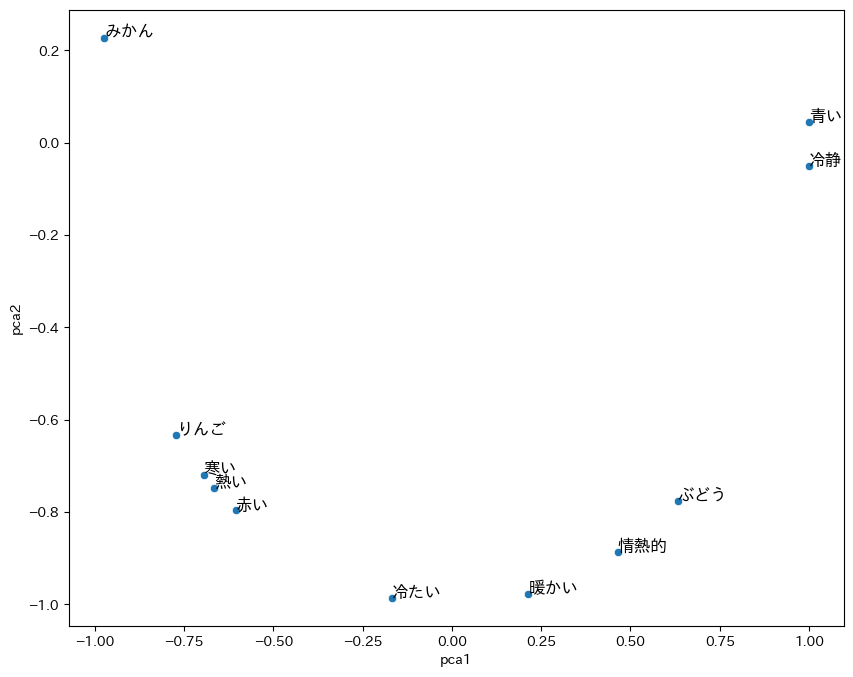

In [8]:
df["norm"] = df["emb"].apply(lambda x: normalize_l2(x[:2]))
df["pca1"] = df["norm"].apply(lambda x: x[0])
df["pca2"] = df["norm"].apply(lambda x: x[1])

display(df)

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="pca1", y="pca2")
for i in range(len(df)):
    plt.text(df.pca1[i], df.pca2[i], df.word[i], fontsize=12)
plt.show()

## Cosine Similarity

In [9]:
df = pd.DataFrame(words, columns=["word"])
df["emb"] = df["word"].apply(lambda x: get_embedding(x))

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

cos_df = pd.DataFrame(
    cosine_similarity(df["emb"].values.tolist()), columns=df.word, index=df.word
)

display(cos_df)

word,りんご,みかん,ぶどう,暖かい,熱い,寒い,冷たい,青い,赤い,情熱的,冷静
word,,,,,,,,,,,
りんご,1.000000,0.391189,0.442537,0.272475,0.285679,0.287048,0.272771,0.275784,0.315698,0.246630,0.205922
みかん,0.391189,1.000000,0.343140,0.252373,0.247220,0.255064,0.247430,0.287924,0.285008,0.193924,0.217067
ぶどう,0.442537,0.343140,1.000000,0.294207,0.237895,0.278091,0.290057,0.341679,0.296449,0.171554,0.244933
暖かい,0.272475,0.252373,0.294207,1.000000,0.672878,0.629549,0.658347,0.339275,0.393717,0.566170,0.414501
熱い,0.285679,0.247220,0.237895,0.672878,1.000000,0.584819,0.544987,0.406088,0.512827,0.848085,0.288945
寒い,0.287048,0.255064,0.278091,0.629549,0.584819,1.000000,0.738075,0.408085,0.439698,0.503573,0.497987
冷たい,0.272771,0.247430,0.290057,0.658347,0.544987,0.738075,1.000000,0.381881,0.390422,0.466598,0.576801
青い,0.275784,0.287924,0.341679,0.339275,0.406088,0.408085,0.381881,1.000000,0.702167,0.314549,0.321636
赤い,0.315698,0.285008,0.296449,0.393717,0.512827,0.439698,0.390422,0.702167,1.000000,0.452508,0.236283
